In [1]:
%config IPCompleter.greedy=True  # Podpowiedzi składni
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import random
import itertools
import math


In [2]:
file = open('kroA100.tsp.txt')
#file = open('kroB100.tsp.txt')

In [3]:
# Pozbądź się tych niepotrzebnych linii na początku

next_line = file.readline()[0:-1]
while next_line[0] != "1":
    next_line = file.readline()[0:-1]
print(next_line)

1 1380 939


In [4]:
# Wczytaj wszystkie punkty do tablicy

points_tab = []
while next_line!= "EOF":
    points_tab.append(next_line.split(" "))
    next_line = file.readline()[0:-1]

In [5]:
for x in range(len(points_tab)):
    for y in range(len(points_tab[0])):
        points_tab[x][y] = int(points_tab[x][y])
    points_tab[x][0] = points_tab[x][0] - 1
print(len(points_tab))
print(len(points_tab[0]))
#print(points_tab)

100
3


In [6]:
# Funkcja prawdiłowo zaokrąglająca
def round2(number):
    if (number - math.trunc(number) >= 0.5):
        return math.trunc(number) + 1
    else:
        return math.trunc(number)

# Tablica odległości między punktami
length_tab = np.zeros((len(points_tab),len(points_tab)), dtype=int)
for x in range(len(length_tab)):
    for y in range(len(length_tab[0])):
        length_tab[x][y] = round2(math.sqrt((points_tab[x][1] - points_tab[y][1])**2 + (points_tab[x][2] - points_tab[y][2])**2))  # długość między punktem "x" i "y" w tablicy base_tab
print(length_tab)

[[   0 1693 2252 ...  783 1468 2643]
 [1693    0 1708 ... 1911 3156 1831]
 [2252 1708    0 ... 1786 3315  454]
 ...
 [ 783 1911 1786 ...    0 1535 2228]
 [1468 3156 3315 ... 1535    0 3760]
 [2643 1831  454 ... 2228 3760    0]]


In [7]:
# funkcja zwracająca losową tablicę-ścieżkę oraz tablicę pozostałych punktów
def get_random_path():
    path = np.arange(100)
    np.random.shuffle(path)
    inside = list(path[:50])
    outside = list(path[50:])
    return inside, outside

path, out = get_random_path()
print(path, out)

#print(points_tab[0][1:])

[80, 41, 2, 4, 43, 32, 29, 8, 90, 25, 93, 58, 6, 16, 36, 68, 19, 70, 99, 81, 72, 27, 49, 14, 78, 65, 97, 94, 73, 54, 83, 3, 69, 56, 75, 33, 28, 60, 57, 74, 95, 59, 45, 66, 31, 67, 23, 7, 18, 50] [86, 77, 55, 15, 30, 51, 53, 82, 63, 47, 48, 62, 84, 38, 13, 42, 87, 26, 17, 89, 44, 1, 40, 10, 98, 20, 88, 92, 39, 52, 22, 0, 5, 46, 37, 79, 85, 76, 9, 12, 64, 34, 61, 96, 71, 24, 11, 21, 91, 35]


In [8]:
import copy

# Funkcja rysująca punkty na płaszczyźnie - zależnie od pochodzenia odpowiednio w różnych kolorach, połączone lub nie
def print_graph(path, out):
    points_inside = []
    points_outside = []

    plt.figure()
    for i in path:
        points_inside.append(copy.deepcopy(points_tab[i][1:]))
    for i in out:
        points_outside.append(copy.deepcopy(points_tab[i][1:]))

    points_inside_0 = []
    for x in points_inside:
        points_inside_0.append(copy.deepcopy(x[0]))
    points_inside_0.append(copy.deepcopy(points_inside[0][0]))
    
    points_inside_1 = []
    for x in points_inside:
        points_inside_1.append(copy.deepcopy(x[1]))
    points_inside_1.append(copy.deepcopy(points_inside[0][1]))

    points_outside_0 = []
    for x in points_outside:
        points_outside_0.append(copy.deepcopy(x[0]))
    points_outside_1 = []
    for x in points_outside:
        points_outside_1.append(copy.deepcopy(x[1]))

    plt.plot(points_inside_0,points_inside_1, '-o')
    plt.plot(points_outside_0,points_outside_1, 'o')
    plt.show()

#print_graph(path, out)

In [9]:
# Funkcja zwracająca długość ścieżki
def distance(path):
    dist = 0
    for x in range(len(path) - 1):
        dist+=length_tab[path[x]][path[x+1]]
    dist+=length_tab[path[len(path)-1]][path[0]]
    return dist

dist = distance(path)
print(dist)

74327


# GREEDY

POINTS_VERSION

Min_path: 21677
Average_path: 30083.47
Max_path: 39536

Min_time: 0.08893959999999979
Average_time: 0.23974491300000023
Max_time: 0.4881643000000002


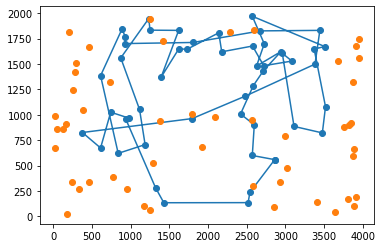

In [10]:
import random
import time


'''
min, max i średnia długość ścieżki i czas
najlepsze rozwiązanie jako path i out
'''
min_path = 1000000
average_path = 0
max_path = 0

min_time = time.perf_counter() + 100
average_time = 0
max_time = 0

best_path = [0]
best_out = [0]


for iterator in range(100):
    path_time = time.perf_counter()
    path, out = get_random_path()
    while True:  # Dopóki znajduje lepsze ścieżki
        new_path = copy.deepcopy(path)
        for x in range(len(path))[:]:  # Dla każdego punktu

            new_point_index = random.randint(0, 49)  # Losuj punkt do wymiany
            new_point_path = copy.deepcopy(new_path)

            new_point_path.remove(new_path[x])  # Zamień punkty
            new_point_path.insert(new_path.index(new_path[x]), out[new_point_index])

            if distance(new_point_path) < distance(new_path):  # Jeśli jest to lepsze rozwiązanie, zapisz zmiany
                out.remove(out[new_point_index])
                out.insert(new_point_index, new_path[x])
                new_path = copy.deepcopy(new_point_path)
        
        if distance(new_path) < distance(path):  # Jeśli ścieżka jest lepsza, zapisz rezultat - zawsze gdy choć raz powyższy warunek
            path = new_path
        else:  # Jeśli nie, zakończ
            break
            
            
            
    path_time = time.perf_counter() - path_time
    
    if distance(path) < min_path:
        min_path = distance(path)
        best_path = path
        best_out = out
    if distance(path) > max_path:
        max_path = distance(path)
    average_path += distance(path)
    
    if path_time < min_time:
        min_time = path_time
    if path_time > max_time:
        max_time = path_time
    average_time += path_time
    
    
print("Min_path: "+str(min_path))
print("Average_path: "+str(average_path/100))
print("Max_path: "+str(max_path))
print()
print("Min_time: "+str(min_time))
print("Average_time: "+str(average_time/100))
print("Max_time: "+str(max_time))

print_graph(best_path, best_out)

EDGES_VERSION

Min_path: 18972
Average_path: 26665.23
Max_path: 37696

Min_time: 0.1097608000000001
Average_time: 0.2536023540000001
Max_time: 0.5010574000000005


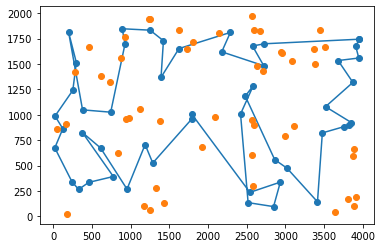

In [11]:
min_path = 1000000
average_path = 0
max_path = 0

min_time = time.perf_counter() + 100
average_time = 0
max_time = 0

best_path = [0]
best_out = [0]


for iterator in range(100):
    path_time = time.perf_counter()
    path, out = get_random_path()

    while True:  # Dopóki znajduje lepsze ścieżki
        new_path = copy.deepcopy(path)
        for x in range(len(path))[:]:  # Dla każdej krawędzi

            new_edge_2 = random.randint(0, len(path)-1)  # Losuj drugą krawędź do wymiany
            while new_edge_2 == x:
                new_edge_2 = random.randint(0, len(path)-1)

            new_edge_path = copy.deepcopy(new_path)

            for y in range(int(abs(new_edge_2 - x)/2)):  # Zamiana krawędzi, czyli obrócenie elementów w zbiorze (krawędź1; krawędź2>
                if x < new_edge_2:
                    new_edge_path[x + 1 + y], new_edge_path[new_edge_2 - y] = new_edge_path[new_edge_2 - y], new_edge_path[x + 1 + y]
                else:
                    new_edge_path[new_edge_2 + 1 + y], new_edge_path[x - y] = new_edge_path[x - y], new_edge_path[new_edge_2 + 1 + y]

            if distance(new_edge_path) < distance(new_path):  # Jeśli jest to lepsze rozwiązanie, zapisz zmiany
                new_path = copy.deepcopy(new_edge_path)

        if distance(new_path) < distance(path):  # Jeśli ścieżka jest lepsza, zapisz rezultat
            path = new_path
        else:  # Jeśli nie, zakończ
            break
        
        
    path_time = time.perf_counter() - path_time
    
    if distance(path) < min_path:
        min_path = distance(path)
        best_path = path
        best_out = out
    if distance(path) > max_path:
        max_path = distance(path)
    average_path += distance(path)
    
    if path_time < min_time:
        min_time = path_time
    if path_time > max_time:
        max_time = path_time
    average_time += path_time
    
    
print("Min_path: "+str(min_path))
print("Average_path: "+str(average_path/100))
print("Max_path: "+str(max_path))
print()
print("Min_time: "+str(min_time))
print("Average_time: "+str(average_time/100))
print("Max_time: "+str(max_time))

print_graph(best_path, best_out)

# STEEPEST

POINTS_VERSION

Min_path: 22122
Average_path: 34453.95
Max_path: 47370

Min_time: 0.6898934999999966
Average_time: 0.7978956089999987
Max_time: 1.2690697000000029


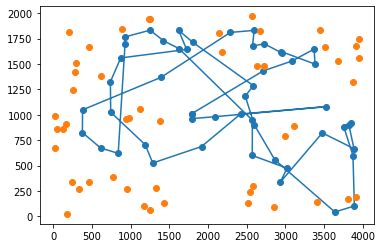

In [12]:
import random

min_path = 1000000
average_path = 0
max_path = 0

min_time = time.perf_counter() + 100
average_time = 0
max_time = 0

best_path = [0]
best_out = [0]


for iterator in range(100):
    path_time = time.perf_counter()
    path, out = get_random_path()

    path_mixed = [e for e in range(len(path))]
    np.random.shuffle(path_mixed)
    #print(path_mixed)

    for x in path_mixed:  # Dla każdego punktu ze ścieżki w losowej kolejności - dla niepowtarzających się wyników
        new_path = copy.deepcopy(path)  
        for y in range(len(out))[:]:  # Sprawdź każdy punkt spoza ścieżki

            new_point_path = copy.deepcopy(new_path)

            new_point_path.remove(new_path[x])  # Zamień punkty
            new_point_path.insert(new_path.index(new_path[x]), out[y])

            if distance(new_point_path) < distance(new_path):  # Jeśli jest to lepsze rozwiązanie, zapisz zmiany
                out.remove(out[y])
                out.insert(y, new_path[x])
                new_path = copy.deepcopy(new_point_path)

        if distance(new_path) < distance(path):  # Jeśli ścieżka jest lepsza, zapisz rezultat - zawsze gdy choć raz powyższy warunek
            path = copy.deepcopy(new_path)
    
    
    path_time = time.perf_counter() - path_time
    
    if distance(path) < min_path:
        min_path = distance(path)
        best_path = path
        best_out = out
    if distance(path) > max_path:
        max_path = distance(path)
    average_path += distance(path)
    
    if path_time < min_time:
        min_time = path_time
    if path_time > max_time:
        max_time = path_time
    average_time += path_time
    
    
print("Min_path: "+str(min_path))
print("Average_path: "+str(average_path/100))
print("Max_path: "+str(max_path))
print()
print("Min_time: "+str(min_time))
print("Average_time: "+str(average_time/100))
print("Max_time: "+str(max_time))

print_graph(best_path, best_out)

EDGES_VERSION

Min_path: 18694
Average_path: 25981.18
Max_path: 32709

Min_time: 0.7109804000000111
Average_time: 0.8541693660000013
Max_time: 1.610053999999991


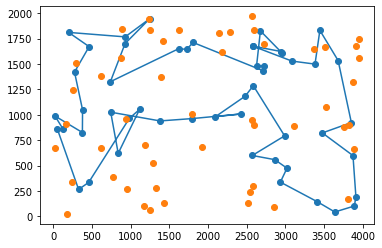

In [13]:
min_path = 1000000
average_path = 0
max_path = 0

min_time = time.perf_counter() + 100
average_time = 0
max_time = 0

best_path = [0]
best_out = [0]


for iterator in range(100):
    path_time = time.perf_counter()
    path, out = get_random_path()

    path_mixed = [e for e in range(len(path))]
    np.random.shuffle(path_mixed)
    #print(path_mixed)


    for x in path_mixed:  # Dla każdej krawędzi w losowej kolejności - dla niepowtarzających się wyników
        new_path = copy.deepcopy(path)
        for y in range(len(path))[:]:  # Dla każdej innej już istniejącej krawędzi
            if x!=y:

                new_edge_path = copy.deepcopy(path)  # *** Kopia z PODSTAWOWEJ ścieżki - w tym algorytmie wybór 1 krawędzi jest nad "new_path = "

                for z in range(int(abs(y - x)/2)):  # Zamiana krawędzi, czyli obrócenie elementów w zbiorze (krawędź1; krawędź2>
                    if x < y:
                        new_edge_path[x + 1 + z], new_edge_path[y - z] = new_edge_path[y - z], new_edge_path[x + 1 + z]
                    else:
                        new_edge_path[y + 1 + z], new_edge_path[x - z] = new_edge_path[x - z], new_edge_path[y + 1 + z]

                if distance(new_edge_path) < distance(new_path):  # Jeśli jest to lepsze rozwiązanie, zapisz zmiany
                    new_path = copy.deepcopy(new_edge_path)

        if distance(new_path) < distance(path):  # Jeśli ścieżka jest lepsza, zapisz rezultat
            path = new_path

        
    path_time = time.perf_counter() - path_time
    
    if distance(path) < min_path:
        min_path = distance(path)
        best_path = path
        best_out = out
    if distance(path) > max_path:
        max_path = distance(path)
    average_path += distance(path)
    
    if path_time < min_time:
        min_time = path_time
    if path_time > max_time:
        max_time = path_time
    average_time += path_time
    
    
print("Min_path: "+str(min_path))
print("Average_path: "+str(average_path/100))
print("Max_path: "+str(max_path))
print()
print("Min_time: "+str(min_time))
print("Average_time: "+str(average_time/100))
print("Max_time: "+str(max_time))

print_graph(best_path, best_out)